In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import requests

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv('abalone_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             3132 non-null   object 
 1   length          3132 non-null   float64
 2   diameter        3132 non-null   float64
 3   height          3132 non-null   float64
 4   whole_weight    3132 non-null   float64
 5   shucked_weight  3132 non-null   float64
 6   viscera_weight  3132 non-null   float64
 7   shell_weight    3132 non-null   float64
 8   type            3132 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.3+ KB


In [4]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
count,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.521392,0.405865,0.138263,0.818738,0.355398,0.178349,0.235616,1.991379
std,0.120756,0.099600,0.039206,0.489560,0.221473,0.109554,0.139215,0.824561
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.345000,0.110000,0.436375,0.181500,0.090875,0.127500,1.000000
50%,0.540000,0.420000,0.140000,0.787000,0.330500,0.168000,0.225000,2.000000
75%,0.610000,0.480000,0.165000,1.141625,0.497500,0.250125,0.323625,3.000000
max,0.815000,0.650000,0.515000,2.825500,1.488000,0.760000,1.005000,3.000000


In [28]:
feature_cols = ['length', 'diameter', 'height', 'whole_weight',
                'shucked_weight', 'viscera_weight', 'shell_weight']

X = df[feature_cols]
y = df['type']

In [49]:
X[X['shell_weight'] == 0]

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


## Scaling the data

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## K-Nearest Neighbors

In [8]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

c:\users\dudes\desktop\programação\projetos pycharm\machinelearning-2021.1\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\dudes\desktop\programação\projetos pycharm\machinelearning-2021.1\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


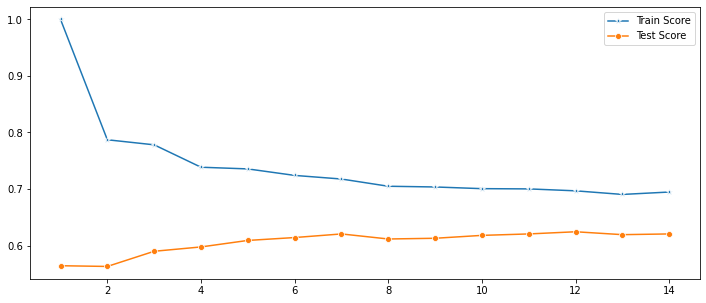

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')


In [10]:
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train,y_train)

preds = knn.predict(X_test)

## Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

best_score = 0
for criterion in ['gini', 'entropy']:
    for max_depth in range(1, 16):
        for max_features in ['auto', 'sqrt', 'log2']:
            rf = RandomForestClassifier(criterion=criterion,
                                        max_depth=max_depth,
                                        max_features=max_features)
            rf.fit(X_train, y_train)
            score = rf.score(X_test, y_test)

            if score > best_score:
                best_score = score
                best_parameters = {
                    'criterion': criterion,
                    'max_depth': max_depth,
                    'max_features': max_features
                }

print(best_score)
print(best_parameters)

0.648786717752235
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}


In [16]:
# rf = RandomForestClassifier()
rf = RandomForestClassifier(
    criterion=best_parameters['criterion'],
    max_depth=best_parameters['max_depth'],
    max_features=best_parameters['max_features']
)
rf.fit(X_train, y_train)

preds = rf.predict(X_test)

## SVM

In [18]:
from sklearn.svm import SVC

best_score = 0
for C in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    for gamma in ['auto', 'scale']:
        for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
            svc = SVC(kernel=kernel, C=C, gamma=gamma)
            svc.fit(X_train, y_train)
            score = svc.score(X_test, y_test)

            if score > best_score:
                    best_score = score
                    best_parameters = {
                        'C': C,
                        'gamma': gamma,
                        'kernel': kernel
                    }
print(best_score)
print(best_parameters)

0.648786717752235
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [19]:
# svc = SVC()
svc = SVC(kernel=best_parameters['kernel'],
          C=best_parameters['C'],
          gamma=best_parameters['gamma'])
svc.fit(X_train, y_train)

preds = svc.predict(X_test)

## Multilayer Perceptron

In [31]:
from sklearn.neural_network import MLPClassifier

best_score = 0
for activation in ['identity', 'logistic', 'tanh', 'relu']:
    for solver in ['lbfgs', 'sgd', 'adam']:
        for learning_rate in ['constant', 'invscaling', 'adaptive']:
            mlp = MLPClassifier(activation=activation, solver=solver, learning_rate=learning_rate)
            mlp.fit(X_train, y_train)
            score = mlp.score(X_test, y_test)

            if score > best_score:
                    best_score = score
                    best_parameters = {
                        'activation': activation,
                        'solver': solver,
                        'learning_rate': learning_rate
                    }
print(best_score)
print(best_parameters)

c:\users\dudes\desktop\programação\projetos pycharm\machinelearning-2021.1\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\dudes\desktop\programação\projetos pycharm\machinelearning-2021.1\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\dudes\desktop\programação\projetos pycharm\machinelearning-2021.1\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize

0.6756066411238825
{'activation': 'logistic', 'solver': 'lbfgs', 'learning_rate': 'invscaling'}


c:\users\dudes\desktop\programação\projetos pycharm\machinelearning-2021.1\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
mlp = MLPClassifier(activation=best_parameters['activation'],
                    solver=best_parameters['solver'],
                    learning_rate=best_parameters['learning_rate'])
mlp.fit(X_train, y_train)

preds = mlp.predict(X_test)

c:\users\dudes\desktop\programação\projetos pycharm\machinelearning-2021.1\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Accuracy Scores

In [33]:
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average="micro")
recall = recall_score(y_test, preds, average="micro")
f1 = f1_score(y_test, preds, average='micro')

print(f'Accuracy:  {accuracy}')
print(f'Precision: {precision}')
print(f'Recall:    {recall}')
print(f'F1:        {f1}')

Accuracy:  0.6704980842911877
Precision: 0.6704980842911877
Recall:    0.6704980842911877
F1:        0.6704980842911877


## Predict and Upload

In [35]:
data = pd.read_csv('abalone_app.csv')[feature_cols]
y_pred = mlp.predict(data)

c:\users\dudes\desktop\programação\projetos pycharm\machinelearning-2021.1\venv\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [36]:
URL = "https://aydanomachado.com/mlclass/03_Validation.php"

DEV_KEY = "Computatchan"

data = {'dev_key': DEV_KEY,
        'predictions': pd.Series(y_pred).to_json(orient='values')}

In [39]:
# Enviando requisição e salvando o objeto resposta
r = requests.post(url=URL, data=data)

# Extraindo e imprimindo o texto da resposta
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n")


# Resultados oficiais:
# 1:
#   Acurácia: 0.6258373205741626
#   Método: KNN com 12 vizinhos e sem pré-processamento
# 2:
#   Acurácia: 0.6488038277511962
#   Método: SVM com C=100, gamma='scale' e kernel='rbf'; sem pré-processamento
# 3:
#   Acurácia: 0.37894736842105264
#   Método: Multilayer Perceptron com activation='logistic', solver='lbfgs' e learning_rate='invscaling';
#   StandardScaler no pré-processamento

# Resultados não-oficiais:
# 1:
#   Acurácia: 0.6258373205741626
#   Método: KNN com 12 vizinhos e sem pré-processamento
# 2:
#   Acurácia: 0.6577266922094508
#   Método: Random Forest com parâmetros default e sem pré-processamento
# 3:
#   Acurácia: 0.665389527458493
#   Método: Random Forest com criterion default, max_depth=7 e max_features='sqrt'; sem pré-processamento
# 4:
#   Acurácia: 0.6743295019157088
#   Método: Random Forest com criterion='entropy', max_depth=7 e max_features='auto'; sem pré-processamento
# 5:
#   Acurácia: 0.6883780332056194
#   Método: SVM com C=100, gamma='scale' e kernel='rbf'; sem pré-processamento
# 6:
#   Acurácia: 0.665389527458493
#   Método: SVM com parâmetros default e sem pré-processamento
# 7:
#   Acurácia: 0.6666666666666666
#   Método: SVM com C=100, gamma='scale' e kernel='rbf'; StandardScaler no pré-processamento
# 8:
#   Acurácia: 0.648786717752235
#   Método: SVM com C=10, gamma='scale' e kernel='rbf'; MinMaxScaler no pré-processamento
# 9:
#   Acurácia: 0.6704980842911877
#   Método: Multilayer Perceptron com activation='logistic', solver='lbfgs' e learning_rate='invscaling';
#   StandardScaler no pré-processamento

 - Resposta do servidor:
 {"status":"success","dev_key":"Computatchan","accuracy":0.37894736842105264,"old_accuracy":0.6488038277512} 

